In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from statistics import mean

In [27]:
#Local testing-- Moving Average Filter setup
x = np.linspace(0, 999, 1000)
y = np.sin(x) + np.random.rand(len(x))*2
N = 3 

cumsum = np.cumsum(y)
moving_averages = []
print(x)
print(len(x))

a = [0, 0, 0, 1, 2, 3, 4, 5, 6]
b = [0, 1, 2, 3, 4, 5, 6, 0, 0]
c = [1, 2, 3, 4, 5, 6, 0, 0, 0]
d = [1, 2, 3, 7]

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [28]:
%%timeit
#Moving average filter padding with percentile
def moving_avg_filter(data, N):
    data_arr = np.concatenate(([np.percentile(data, 1)] * (N), data))
    
    cumsum = np.cumsum(data_arr)
    filtered = (cumsum[N:] - cumsum[:-N]) / N
    return filtered

moving_avg_filter(y, 3)

169 µs ± 4.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit
#Moving average filter padding with min
def moving_avg_filter(data, N):
    data_arr = np.concatenate(([np.min(data)] * (N), data))
    cumsum = np.cumsum(data_arr)
    filtered = (cumsum[N:] - cumsum[:-N]) / N
    return filtered

moving_avg_filter(y, 3)

28.5 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [1]:
#Hard-coded Moving Average Filter implementation for N = 3
data = data_shared[i + 1]
data_arr = np.concatenate(([np.min(orig_arr)] * (3), orig_arr)) #Pads array with 0s
cumsum = np.cumsum(data_arr)
yi = (cumsum[3:] - cumsum[:-3]) / float(3)
data_filtered = np.dstack([data_shared[0], yi])[0]

NameError: name 'data_shared' is not defined

In [8]:
#This one!! Hard coded Moving Average Filter function implementation for N window size
def moving_avg_filter(data, N):
    data = data_shared[i + 1]
    data_arr = np.concatenate(([np.min(original_arr)] * (N), data))
    cumsum = np.cumsum(data_arr)
    yi = (cumsum[N:] - cumsum[:-N]) / float(3)
    data_filtered = np.dstack([data_shared[0], yi])[0]

In [17]:
%%time
##Moving average filter implementation without time testing
def running_mean(y, N):
    cumsum = np.cumsum(y) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

output = running_mean(d, N)
min = np.min(output)
padded_arr = np.concatenate(([min] * (N), output))

plt.plot(d, y)
print(padded_arr)
print(len(padded_arr))

[4. 4. 4. 4.]
4
CPU times: total: 0 ns
Wall time: 7.99 ms


In [ ]:
#Hard coded Moving Average filter implementation (Original Example)
def obtain_grid_plot_data(args_dict: dict):
    """ Update GridPlot data with shared memory object data

    :param args_dict: dictionary containing kwargs for memory and plot management
    :return: no explicit return. Updates GridPlot data, next render cycle will show updated data
    """
    # Unpack dictionary
    grid_plot = args_dict["plot"]
    mutex = args_dict["mutex"]
    shm_name = args_dict["shm_name"]
    shape = args_dict["shape"]
    dtype = args_dict["dtype"]
    channel_key = args_dict["channel_key"]
    # Acquire Shared Memory Object data
    mm.acquire_mutex(mutex)
    shm = SharedMemory(shm_name)
    data_shared = np.ndarray(shape=shape, dtype=dtype,
                             buffer=shm.buf)
    for i, subplot in enumerate(grid_plot):
        yi = data_shared[i+1][0]
        cumsum = np.cumsum(np.insert(data_shared[i+1][:], 0, [yi]*3))
        y_data = (cumsum[3:] - cumsum[:-3])/float(3)
        
        data = np.dstack([data_shared[0], y_data])[0]
        subplot[channel_key[i]].data = data
        subplot.auto_scale(maintain_aspect=False)
    mm.release_mutex(mutex)


def running_mean(y, N):
    cumsum = np.cumsum(y) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

output = running_mean(i, N)
min = np.min(output)
data = np.concatenate(([min] * (N), output))

plt.plot(x, y)
print(padded_arr)
print(len(padded_arr))

Elapsed time:  1001.5283203125
Elapsed time:  1003.61376953125
Elapsed time:  1000.268310546875
Elapsed time:  1002.64794921875
Elapsed time:  1002.816650390625
Elapsed time:  1002.646240234375
Elapsed time:  1002.5498046875
Elapsed time:  1003.4208984375
Elapsed time:  1002.858642578125
Elapsed time:  1000.770751953125
2.3121337890625
[  2.   2.   2.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 12

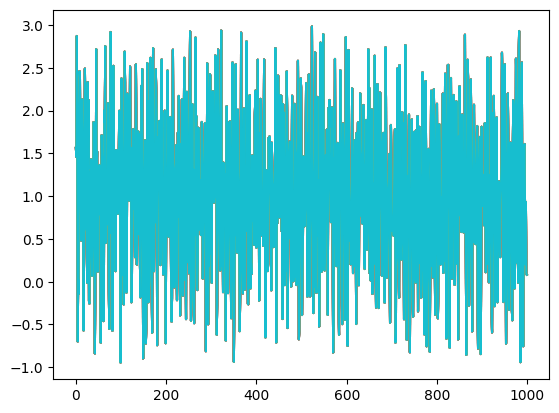

In [18]:
##Moving average filter with time testing using concatenate, around 0.7s average
i = 0
times = []
while i < 10:
    start = time.time() * 1000
    def running_mean(y, N):
        cumsum = np.cumsum(y) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    time.sleep(1)
    end = time.time() * 1000
    elapsed_time = end - start
    times.append(elapsed_time)
    print(f"Elapsed time:  {elapsed_time}")

    plt.plot(x, y)

    output = running_mean(x, N)
    min = np.min(output)
    padded_arr = np.concatenate(([min] * (N), output))
    i +=1

avg_time = np.mean(times) - 1000
print(avg_time)

print(padded_arr)
print(len(padded_arr))

#min_array = np.full(N, min, dtype=output.dtype)
#padded_arr = np.insert(output, 0, min_array)

Elapsed time:  1000.379150390625
Elapsed time:  1000.71435546875
Elapsed time:  1000.91796875
Elapsed time:  1000.31787109375
Elapsed time:  1001.088134765625
Elapsed time:  1001.204833984375
Elapsed time:  1001.13037109375
Elapsed time:  1000.877685546875
Elapsed time:  1000.82275390625
Elapsed time:  1000.794677734375
0.8247802734374545
[ 2.  2.  2.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98.]
100


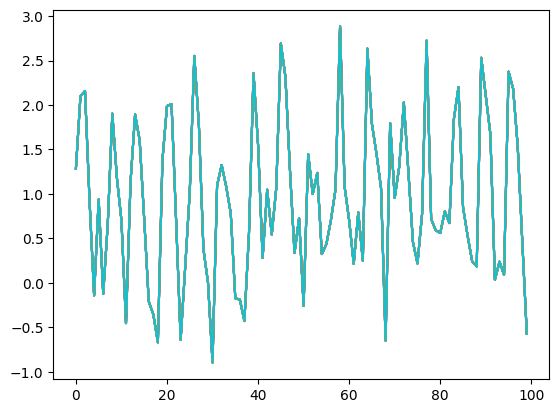

In [ ]:
##Moving average filter with time testing using np.full, np.insert, around 0.8 ms average
i = 0
times = []
while i < 10:
    start = time.time() * 1000
    def running_mean(y, N):
        cumsum = np.cumsum(y) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    time.sleep(1)
    end = time.time() * 1000
    elapsed_time = end - start
    times.append(elapsed_time)
    print(f"Elapsed time:  {elapsed_time}")

    plt.plot(x, y)

    output = running_mean(x, N)
    min = np.min(output)
    min_array = np.full(N, min, dtype=output.dtype)
    padded_arr = np.insert(output, 0, min_array)
    i +=1

avg_time = np.mean(times) - 1000
print(avg_time)

print(padded_arr)
print(len(padded_arr))

Elapsed time:  1000.51708984375
[ 0.51217117  1.85900169  2.0771577   0.50150143  1.02320484  0.66658134
  0.9555061   0.77534239  2.23031724  2.07293087  0.788959    0.19480885
 -0.01352801  2.15363639  2.15938492  1.63484461 -0.23644214  0.23543908
 -0.02606294  1.01929926  2.44745015  1.15593375  0.41162696  0.91227774
  0.40155154  1.64213427  1.35502838  2.7656049   1.81878589  0.51110318
  0.56679481  0.09569327  2.14488732  1.0277964   0.69869393  0.9589522
 -0.81260023  0.71309844  0.52486171  1.39081663  2.4784276   0.8166434
 -0.31769531  0.04309894  0.47597576  1.70967544  1.95655116  0.53699374
  0.88129581  0.26871777  0.32233227  2.37941455  2.23343719  1.41145841
 -0.40802903 -0.07919215  0.47383098  1.85664296  1.09196135  1.91369966
  1.56256657  0.77011227  1.04379596  1.61029567  1.2379183   1.93735556
  1.14232796  0.89249872  0.66359773  1.27563267  1.45414444  2.76590975
  0.44705649  1.25966915 -0.81755295  0.01676312  1.04611545  1.68342368
  0.58890983  1.16824

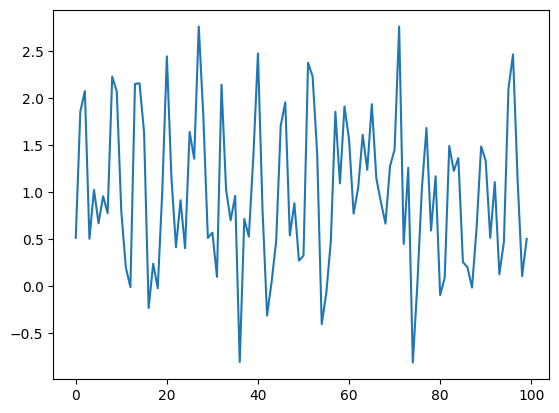

In [ ]:
start = time.time() * 1000
def moving_avg_filter(y, N):
    window_avg = round(cumsum[N  - 1] / N, 2)
    moving_averages.append(window_avg)
    N += 1

time.sleep(1)
end = time.time() * 1000
elapsed_time = end - start

print(f"Elapsed time:  {elapsed_time}")
print(y)
plt.plot(x, y)

output2 =  moving_avg_filter(y, N)
print(len(moving_averages))

In [ ]:
arr = [1, 2, 3, 7, 9, 11, 13, 15, 17]
window_size = 3
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []

while i < len(arr) - window_size + 1:
    start_time = int(round(time.time() * 1000)) #convert to milliseconds
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
end_time = int(round(time.time() * 1000))
elapsed_time = (end_time - start_time)
print(f"Elapsed time: {elapsed_time}") 
print(moving_averages)

Elapsed time: 0
[2.0, 4.0, 6.33, 9.0, 11.0, 13.0, 15.0]
